In [1]:
from power import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

## Flow DC VS AC

Converged in 3 iterations.


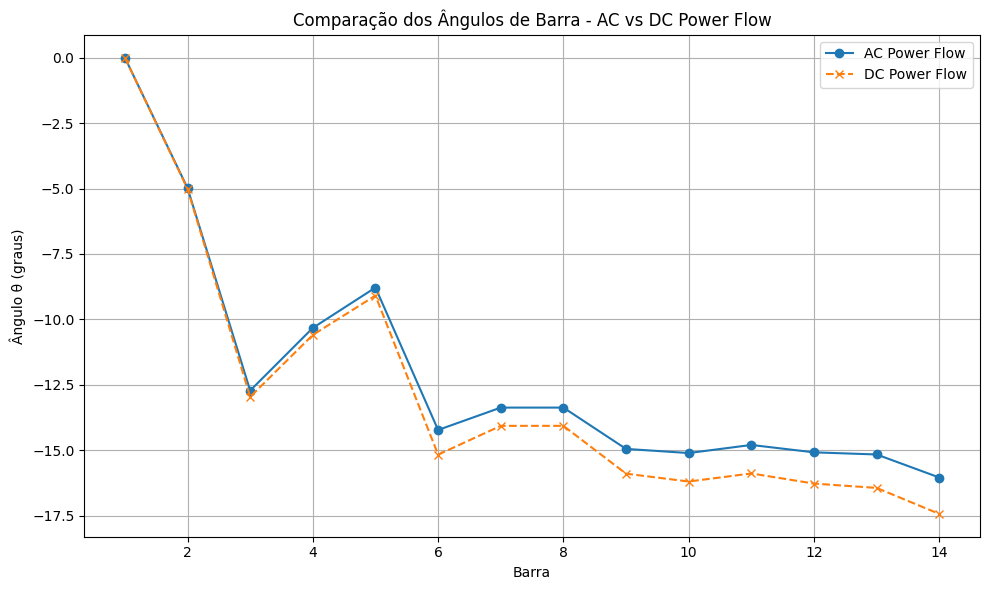

In [2]:
caminho = 'pwf_systems/IEEE14.pwf'
builder = PWF_Network_Builder(caminho)
net = builder.build_network()
solver = AC_PF(net)
solver.solve(verbose=False)
V = solver.V
theta_ac = solver.theta

solver_DC = DC_PF(net)
theta_dc = solver_DC.solve()


# Índice das barras (1, 2, 3, ...)
barras = np.arange(1, len(theta_ac) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(barras, theta_ac, marker='o', label='AC Power Flow')
plt.plot(barras, theta_dc, marker='x', linestyle='--', label='DC Power Flow')
plt.xlabel('Barra')
plt.ylabel('Ângulo θ (graus)')
plt.title('Comparação dos Ângulos de Barra - AC vs DC Power Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Comparação


In [3]:
#Fluxos AC
caminho = 'pwf_systems/IEEE14.pwf'
builder = PWF_Network_Builder(caminho)
net_AC = builder.build_network()
solver_AC = AC_PF(net_AC)
solver_AC.solve(verbose=False)
flow_AC = solver_AC.get_line_flows()
print(flow_AC)

Converged in 3 iterations.
[ 1.52538446  0.72788852  0.70867927  0.54461093  0.40609939 -0.23703421
 -0.61735692  0.0728649   0.07710229  0.1752845   0.          0.28086977
  0.05225817  0.09321136 -0.03786492  0.0160399   0.05578864  0.28086975
  0.16089865  0.44063101]


In [4]:
#Fluxos DC
caminho = 'pwf_systems/IEEE14.pwf'
builder = PWF_Network_Builder(caminho)
net_DC = builder.build_network()
solver_DC = DC_PF(net_DC)
solver_DC.solve()
flow_DC= solver_DC.get_line_flows()
print(flow_DC)

[ 1.47880575  0.71119425  0.70050239  0.55226362  0.40903974 -0.24149761
 -0.62339802  0.06304761  0.07545145  0.17033692  0.          0.2898508
  0.06195239  0.09921163 -0.02804761  0.01445145  0.04978837  0.2898508
  0.16631322  0.42083597]


In [11]:
P = [net_DC.buses[i].p for i in range(len(net_DC.buses))]
# CTDF Ground
T = net_DC.CTDF()

# Calculando os fluxos de linha usando a matriz CTDF
flow_CTDF_grnd = np.real(np.dot(T, P))
print("Fluxos de linha usando CTDF:")
print(flow_CTDF_grnd)


Fluxos de linha usando CTDF:
[ -0.2260436   -1.58323619   1.5715765    3.80558076  -1.95393375
   2.10416301 -24.00261221  -1.65912519   3.4571557    6.67172027
  -0.23417542   4.33142442  -2.23668639   2.90239663  -1.24498881
  -0.07629578   0.03950922   5.3420285    2.8653044    9.94464725]


In [10]:
# CTDF Slack
T = net_DC.CTDF(ref_bus=net_DC.buses[0])
# Calculando os fluxos de linha usando a matriz CTDF
flow_CTDF_slack = np.real(np.dot(T, P))
print("Fluxos de linha usando CTDF:")
print(flow_CTDF_slack)

Fluxos de linha usando CTDF:
[  4.40045631  -0.35587787  -1.19399404   0.70043103  -1.95393375
   2.10416301 -11.00094989   1.09351433   0.24676518   0.36750595
  -1.78824865  -0.64539587   1.00295858  -0.13499519  -1.24498881
  -0.07629578   0.82610195  -1.2032565   -0.580073    -0.91758591]


In [9]:
# CTDF Slack com Ztie = 1j
T = net_DC.CTDF(ref_bus=net_DC.buses[0], z_tie=1j)
# Calculando os fluxos de linha usando a matriz CTDF
flow_CTDF_slack_ztie = np.real(np.dot(T, P))
print("Fluxos de linha usando CTDF com Ztie = 1j:")
print(flow_CTDF_slack_ztie)

Fluxos de linha usando CTDF com Ztie = 1j:
[  4.40045631  -0.35587787  -1.19399404   0.70043103  -1.95393375
   2.10416301 -11.00094989   1.09351433   0.24676518   0.36750595
  -1.78824865  -0.64539587   1.00295858  -0.13499519  -1.24498881
  -0.07629578   0.82610195  -1.2032565   -0.580073    -0.91758591]


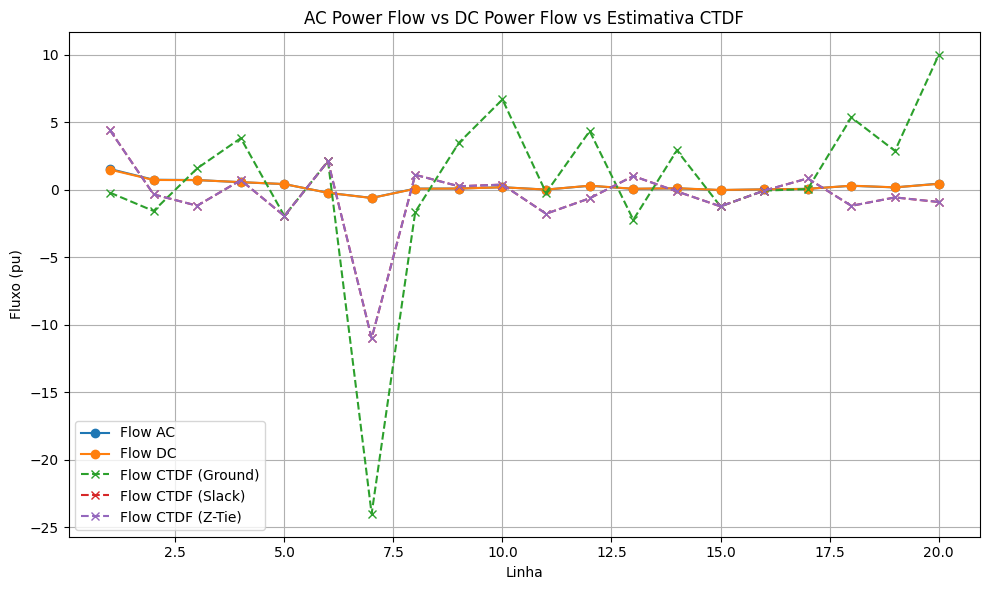

In [13]:
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net_DC.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(linhas, flow_AC, marker='o', label='Flow AC')
plt.plot(linhas, flow_DC, marker='o', label='Flow DC')
plt.plot(linhas, flow_CTDF_grnd, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, flow_CTDF_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, flow_CTDF_slack_ztie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('AC Power Flow vs DC Power Flow vs Estimativa CTDF')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()